In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls "/content/gdrive/My Drive/ml-100k"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [0]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.base",
                    sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.test",
                   sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [0]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [0]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

In [66]:
optimizer  = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1000):
    hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
    cost = F.mse_loss(hypothesis ,ratings)
    loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
    #loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    X.append(epoch)
    Y.append(cost)
    with torch.no_grad():
        hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
        cost_test = F.mse_loss(hypo_test, ratings_test)
        Y_test.append(cost_test)

    if epoch % 100 == 0:
        print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 12.971865
epoch: 100, cost: 0.635949
epoch: 200, cost: 0.607812
epoch: 300, cost: 0.604005
epoch: 400, cost: 0.602867
epoch: 500, cost: 0.602519
epoch: 600, cost: 0.602366
epoch: 700, cost: 0.602278
epoch: 800, cost: 0.602223
epoch: 900, cost: 0.602171


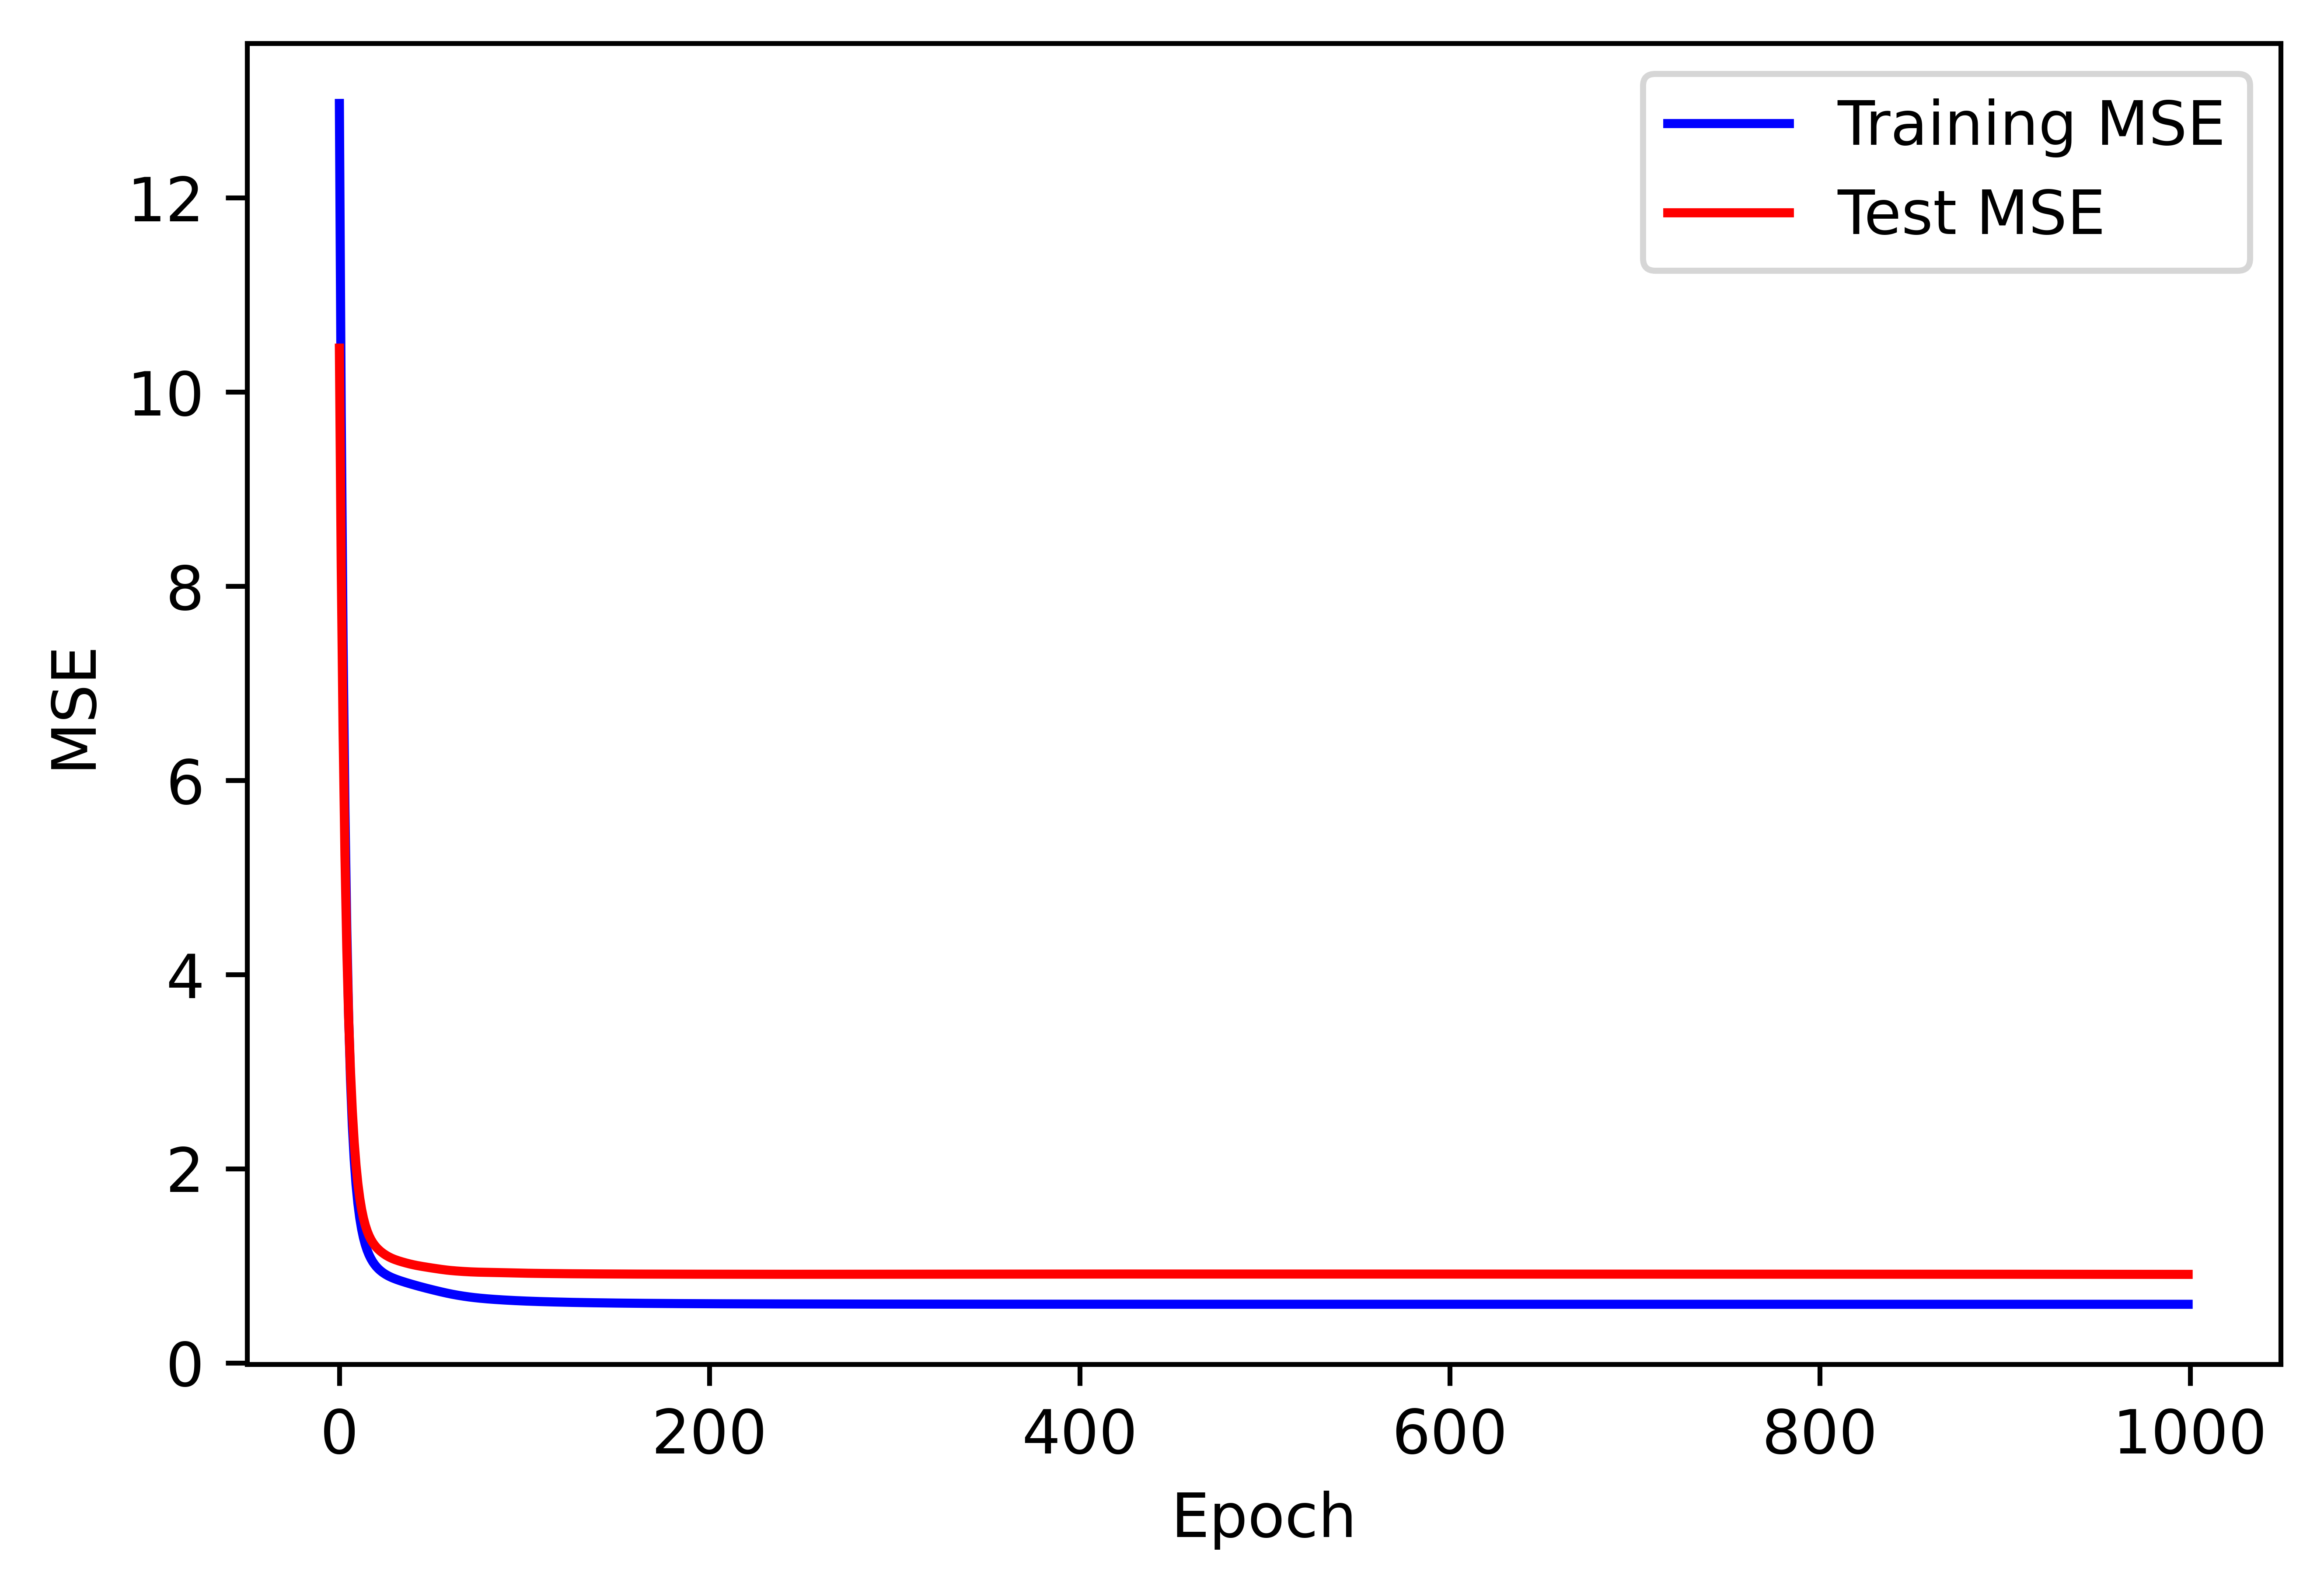

In [67]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [70]:
print(Y[-1])
print(Y_test[-1])

tensor(0.6021, grad_fn=<MseLossBackward>)
tensor(0.9103)
